In [ ]:
#import the dataset 
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
#Allow google colab to access images on your desktop to import them here
from google.colab import files
from IPython.display import Image

In [4]:
#Upload image of a car from your desktop
uploaded = files.upload()

Saving automobile.jpg to automobile.jpg


In [5]:
#Upload image of a dog from your desktop
uploaded = files.upload()

Saving dog.jpg to dog.jpg


In [ ]:
#Normalize the pixels to fit the model that the CNN can read
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
#The layers for a CNN network
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential()

In [ ]:
#The first layers resizes the image into a 5x5 and the Conv2D will go make association when the image
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))

In [ ]:
#The pooling layer does the same layer from Conv2D to all the other images
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#The layer is active reading the images in 2D array 
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#This layer simplifies the array into 1D so the CNN will 
model.add(Flatten())

In [ ]:
#The hidden layer that simplifies the raw data into readable data
model.add(Dense(1000, activation='relu'))

In [ ]:
#The second hidden layer handles what Relu does and help classification into the category of the data set
model.add(Dense(10, activation='softmax')) 

In [ ]:
#Parameters of the model we are trying to calculate, which are the loss and accuracy 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#The epoch starts to train through the images to get the accuracy
hist = model.fit(x_train, y_train_one_hot, batch_size=128, epochs=15, validation_split= 0.4)

Epoch 1/15
235/235 [==============================] - 63s 270ms/step - loss: 1.5882 - accuracy: 0.4287 - val_loss: 1.3988 - val_accuracy: 0.5034
Epoch 2/15
235/235 [==============================] - 63s 269ms/step - loss: 1.2550 - accuracy: 0.5534 - val_loss: 1.2331 - val_accuracy: 0.5641
Epoch 3/15
235/235 [==============================] - 63s 267ms/step - loss: 1.0859 - accuracy: 0.6192 - val_loss: 1.1173 - val_accuracy: 0.6082
Epoch 4/15
235/235 [==============================] - 63s 266ms/step - loss: 0.9642 - accuracy: 0.6606 - val_loss: 1.0670 - val_accuracy: 0.6326
Epoch 5/15
235/235 [==============================] - 62s 265ms/step - loss: 0.8604 - accuracy: 0.6997 - val_loss: 1.0420 - val_accuracy: 0.6392
Epoch 6/15
235/235 [==============================] - 62s 262ms/step - loss: 0.7518 - accuracy: 0.7362 - val_loss: 0.9776 - val_accuracy: 0.6698
Epoch 7/15
235/235 [==============================] - 61s 261ms/step - loss: 0.6659 - accuracy: 0.7690 - val_loss: 1.0471 - val_ac

In [ ]:
#Evaluate how the good the model of this is 
model.evaluate(x_test, y_test_one_hot)[1]

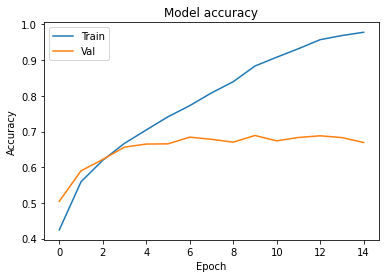

In [ ]:
#Visualize the models accuracy
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

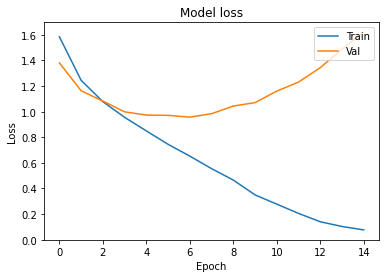

In [ ]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

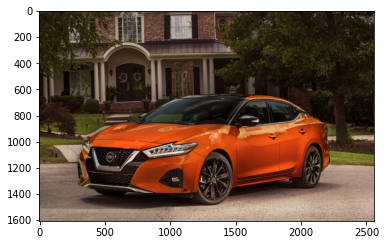

In [ ]:
#Rescale the image here so the CNN can interpret it easier
from skimage.transform import resize
import numpy as np
import time
my_image = plt.imread("automobile.jpg")
img = plt.imshow(my_image)

In [ ]:
#Testing the model here and display the accuracy and the category it belongs too from the dataset
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'Deer', 'dog', 'frog', 'horse', 'ship', 'truck']
start = time.time()
my_image_resized = resize(my_image, (32,32,3))  
probabilities = model.predict(np.array( [my_image_resized,] ))
index = np.argsort(probabilities[0,:])
print("Identified class:", number_to_class[index[9]])
print("Probability:", probabilities[0,index[9]])
total = time.time() - start
print("classification rate: %s images per second" % (total))

Identified class: automobile
Probability: 1.0
classification rate: 5.04192852973938 images per second


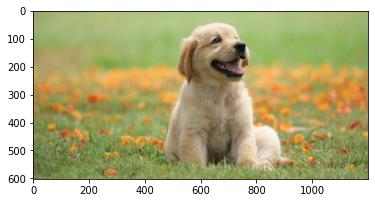

In [ ]:
#Rescale the image here so the CNN can interpret it easier
from skimage.transform import resize
import numpy as np
import time
my_image = plt.imread("dog.jpg")
img = plt.imshow(my_image)

In [ ]:
#The 2nd test of the model here and display the accuracy and the category it belongs too
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'Deer', 'dog', 'frog', 'horse', 'ship', 'truck']
start = time.time()
my_image_resized = resize(my_image, (32,32,3))  
probabilities = model.predict(np.array( [my_image_resized,] ))
index = np.argsort(probabilities[0,:])
print("Identified class:", number_to_class[index[9]])
print("Probability:", probabilities[0,index[9]])
total = time.time() - start
print("classification rate: %s images per second" % (total))

Identified class: bird
Probability: 0.6209423
classification rate: 0.4248378276824951 images per second
